In [21]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling.functional_models import AiryDisk2D

# Optics

<div class="alert alert-block alert-success">
    <b> Key Question </b>

What's the minium distance between two objects which can individually resolved, and how do optical telescopes work?
</div>

## Fraunhofer diffraction

Recall from your optics lecture that a wave with wavelength $\lambda$ which passes through a slit of width $a$, where $a$>>$\lambda$, will produce a pattern given by:
$$
    I = I_0 \frac{\sin^2(\frac{\pi a \sin(\theta)}{\lambda})}{\left[\frac{\pi a \sin(\theta)}{\lambda}\right]^2}
$$
This is shown in the below figure. This pattern has a minima at $\sin\theta=\frac{m\lambda}{a}$ where m is an integer. The interesting thing here is to think about what the mathematical relationship between the slit (which is a boxcar function) and the Intensity is. The Fourier transform of a boxcar is a sinc, and our function is a sinc$^2$. This is a branch of optics known as Fourier optics, which allows us to use Fourier methods to establish what various optical elements are doing.

![SingleSlit](Images/Single_Slit.svg)

If the slit is 2 dimensional, like the aperture of a telescope, then the pattern produce is this function rotated around it's axis, and is called an Airy Disc. In this case, the difference between the minima can still be given by $\sin\theta=\frac{m\lambda}{a}$, but m is no longer integer. The first minimum occurs when $m=1.22$ (the derivation is tough and beyond the scope of this current module).

![AiryDisc](Images/Airy_discs.png)

So, if we have 2 sources in our image, they will both produce Airy Discs. In order to not have their primary peaks overlapping, we want their angular separation to be:
$$
\sin\theta>\frac{1.22\lambda}{a}
$$
or, for small angles
$$
\theta>\frac{1.22\lambda}{a}.
$$
This is the Rayleigh criteria, and is very important when considering what wavelength to observer your source at.

<div class="alert alert-block alert-info">
    <b>Example: A 10m optical telescope</b>

For a 10m aperture optical telescope (observing at $\lambda=500$Å) we find that
    
$$
    \theta=\frac{1.22\times0.5\mu m}{10m}=0.01{\rm''}
$$

Again, this is much smaller than the seeing we're used because of Earth's atmosphere. As such, it makes sense to put optical telescopes into space where they can make 
full use of their resolution.
    
For example, consider the HST. It's mirror is 2.5 meters in diameter so $\theta=0.05{\rm''}$.
</div>

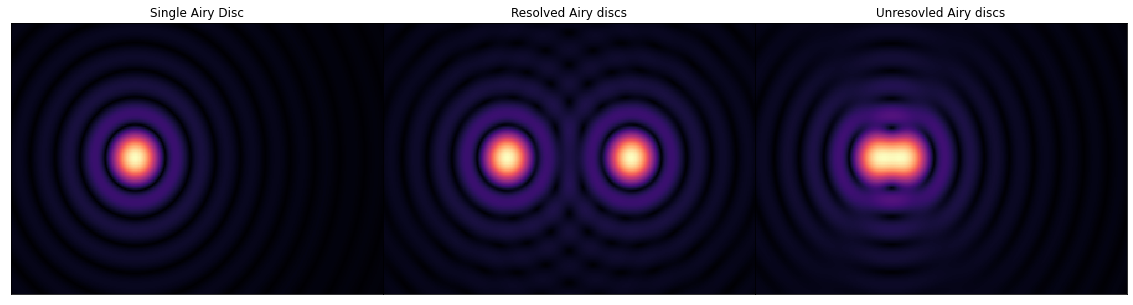

In [54]:
x = np.arange(-5,10,0.05)
y = np.arange(-5,5,0.05)
X, Y = np.meshgrid(x, y)
disc_func = AiryDisk2D()
z1 = disc_func.evaluate(X,Y,amplitude=1,x_0=0,y_0=0,radius=1.22)
z2 = disc_func.evaluate(X,Y,amplitude=1,x_0=5,y_0=0,radius=1.22)
z3 = disc_func.evaluate(X,Y,amplitude=1,x_0=1,y_0=0,radius=1.22)

fig,ax = plt.subplots(nrows=1,ncols=3,figsize=[20,5])
ax[0].pcolormesh(x,y,z1**0.4,cmap='magma') 
ax[1].pcolormesh(x,y,(z1+z2)**0.4,cmap='magma') 
ax[2].pcolormesh(x,y,(z1+z3)**0.4,cmap='magma')

for axs in ax:
    axs.set_xticks([])
    axs.set_yticks([])
ax[0].set_title("Single Airy Disc")
ax[1].set_title("Resolved Airy discs")
ax[2].set_title("Unresovled Airy discs")
plt.subplots_adjust(wspace=0)
plt.savefig("Images/Airy_discs.png")
plt.show()

## 4 branches of Astronomy

Now, consider the folllowing three wavelength regimes:

- Radio (10m-mm). Take a 40m telescope and lambda=1m, then $\theta=0.8^{\rm o}$.
- IR (30μm-1μm). Take a 6.5m telescope and lambda=10μm, then $\theta=0.4^{\rm "}$.
- Optical (300 nm - 1 μm). Take a 10m telescope and lambda=500μm, then $\theta=0.01^{\rm "}$.
- X-ray (0.12 nm - 4.1 nm). Take a 1 m telescope and lambda=1 nm, then $\theta=0.0002^{\rm "}$.

So, single dish radio telescopes have very poor resolution (we'll get to this next lecture), while X-ray imaging should have outstanding resolution. From our viewpoint on the Earth's atmosphere, we have access to a limited window, covering the optical window and the radiow window (image from https://www.weather.gov/jetstream/absorb)

![Atmosphereic Absorption](Images/energy_breakdown2.svg)

## Telescope Designs

So how do we design optical telescopes to maximise their effectiveness? There are three optical designs which telescopes follow: Prime focus, Newtonian, and Cassigrian. Each of them is capable of having active supporting units under their primary mirrors, which allows mirrors to keep their shape when at an angle to Earth's gravitational field.

![Optical Designs](Images/Optics_Designs.svg)

![Telescope Designs](Images/Telescope_Designs.svg)

In combination to the optical design, there is also the question of mount design. There are two primary designs: equatorial, and Altitude-Azimuth design (Alt-Az). For equatorial telescopes, one of the axe's is aligned parllel to the Earth's rotational axis. This means that when the telescope is point at a star, it then only requires movement around one axis in order to track stars. Very common for small, commerical telescopes, but for large telescopes, they require huge counterweights, and so becomes expensive The Hale telescope for example: https://sites.astro.caltech.edu/palomar/about/telescopes/hale.html. It's a 5m telescope, but requires a Dome which is 41 m tall and 42 m in diameter

![Equatorial Telescope](Images/Hale_telescope.jpg)

Alt-Az telescopes are significantly more compact in design. One axis is perpendicular to the Zenith, the otheris parallel to it. As such, they require motion around 2 axes in order to track stars. See, for example, the VLT (https://www.eso.org/public/images/potw1036a/) These 10m telescope only need a dome with is 30 m tall and 28 m in diameter.

![AltAz Telescope](Images/VLT.jpg)

## Optical

The human eye has a very low quantum efficiency (QE) of about 1% (this means around 1 in every 100 photons is actually detected). At optical wavelengths, we typicall use CCDs, or charged-coupled devices, for observations. This is due to their very high quantum efficiency, meaning their response is nearly linear - that is, the number of counts you observer is directly proportional to the intensity of light.

They also have very high dynamic ranges - each pixel in a CCD is capable of registering up to ~65,000 counts accurately. Typically, CCD's are Si based. As a photon interacts with a given pixel, it causes excitation of an electron into a conduction band. When finished observing, the accumulation of charge within a pixel can be shifted to an adjacent pixel. As such, an image is read out pixel-by-pixel, as shown below.


Now, assume the number of photons reaching our detector over a fixed interval of time is $N$, but the arrival time of each photon is randomly distributed. The probability of detecting $k$ photons over a fixed time interval is then given by a Poisson distribution
$$
    P(k)=\frac{N^k\exp^{-N}}{k!}
$$

For large N (>10), this becomes a Gaussian with $\sigma=\sqrt N$ (see below)

$$
    P(k)=\frac{1}{\sqrt{2\pi\sigma^2}}e^{-(k-N)^2/2\sigma^2}
$$

As such, any process which involves a large number of events has an ideal error on it of $\sqrt N$ - this is called shot noise.

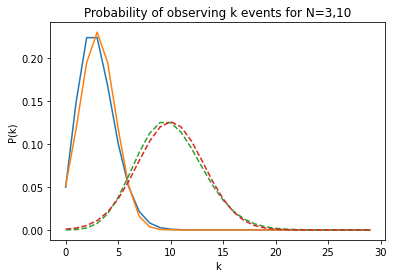

In [20]:
k = np.arange(0,30,1)

#For N = 3
N=3.0
P_k=[]
for k_i in k:
    P_k.append(N**k_i*np.exp(-N)/np.math.factorial(k_i)) # Poisson Distribution
G_k=1/np.sqrt(2*np.pi*N)*np.exp(-(k-N)**2/(2*N)) # Gaussian Distribution

plt.plot(k,P_k,'-')
plt.plot(k,G_k,'-')

#Fpr N = 10
N=10.0
P_k=[]
for k_i in k:
    P_k.append((N**k_i)*np.exp(-N)/np.math.factorial(k_i)) # Poisson Distribution
G_k=1/np.sqrt(2*np.pi*N)*np.exp(-(k-N)**2/(2*N)) # Gaussian Distribution

plt.plot(k,P_k,'--')
plt.plot(k,G_k,'--')
plt.xlabel("k")
plt.ylabel("P(k)")
plt.title("Probability of observing k events for N=3,10")
plt.show()

Now imagine we wish to measure the signal-to-noise(SNR) ratio of a star. This is given by:
$$
    {\rm SNR} = \frac{Signal}{Noise}
$$
For a CCD, there are 4 main sources of noise:
- Shot noise due to $S_0$ photons from the source, $\sigma_0=\sqrt S_0$
- Shot noise due to $S_b$ photons from the background, $\sigma_b=\sqrt S_b$
- Shot noise due to $S_d$ counts casued by the thermal properties of the CCD, $\sigma_d=\sqrt S_d$.
- A time independant readout out noise, $\sigma_R=R$. This is not a square root, and is the standard deviation in the number of electrons measured at the readout step.

Let's assume all of these processes are independant. We are also going to assume they all involve high enough numbers that they are Gaussians. As such, the variance of the sum is the sum of the variances, $\sigma_{\rm Total}^2 = \sigma_0^2+\sigma_b^2+\sigma_d^2+\sigma_R^2$. As such, the noise term, $N=\sigma_{\rm Total}$, is given by
$$
    N = \sqrt{S_0+S_b+S_d+R^2}
$$
and thus the Signal-to-Noise ratio is given by
$$
    {\rm SNR} = \frac{S_0}{\sqrt{S_0+S_b+S_d+R^2}}.
$$
This is the most basic form of this equation. Note that $S_0$, $S_b$, and $S_d$ will all scale linearly with exposure time.

There are 3 limiting cases for the basic form of the equation.

1. **Object limited: $S_0 >> S_b,S_d,R^2$**.
    In this case, the equation simplifies to ${\rm SNR}=\frac{S_0}{\sqrt S_0}=\sqrt {S_0}$. Since the number of counts detected, $S_0$, is proportional to time, then SNR $\propto \sqrt{t}$. This means you eventually get diminishing returns on increasing your exposure time. Additionally, $S_0$ is proportional to $D^2$, where D is the aperture of the telescope. As such, SNR $\propto D$.
2. **Background limited: $S_b >> S_0,S_d,R^2$**
    In this case, we get  ${\rm SNR}=\frac{S_0}{\sqrt S_b}$. Both $S_0$ and $S_b$ scale the same way with exposure time and telescope aperture, and the SNR scales the same as in the above. For fixed $S_0$, the SNR scales with the square root of the background signal - so if your background increases (because for example the moon rises), the SNR drops. This is important in determining when to observer your targets - can they withstand a bright moon, or do you need no moon at all?
3. **Read noise limited: $R^2 >> S_0,S_b,S_d$**
    Read noise is indepedant of exposure time, so this typically only occurs for short exposures. ${\rm SNR}=\frac{S_0}{R}$. In this regime, since $R is time independant, SNR scales linearly with time and with the square of the aperture.